In [1]:
# This is to allow Tensorflow to work with Deepnote. It may be removed if unrequired
!python3 -m pip install pip --upgrade
!pip install pyopenssl --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.5/446.5 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 25.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-connector-python 2.8.0 requires cryptography<37.0.0,>=3.1.0, but you have cryptography 44.0.0 which is incompatible.
snowflake-connector-python 2.8.0 requires pyOpenSSL<23.0.0,>=16.2.0, but you have pyopenssl 24.3.0 which is incompatible.
snowflake-connector-python 2.8.0 requires urllib3<1.27,>=1.21.1

In [2]:
##Exploritory data Visualization
##Experiment with feature selection techniques
##Do adding stacking for regression and add nearual network and post the results
##Add correlation heat map
##Add table to compare all the single models and compare ensemble techniques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import Sequential

2024-12-03 21:51:23.105811: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 21:51:23.165928: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 21:51:23.166879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 21:51:24.322523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Exploring the Data (Raw)

In [3]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Quick data-heavy exploration
print(data.describe(include='all'))

        Hours_Studied   Attendance Parental_Involvement Access_to_Resources  \
count     6607.000000  6607.000000                 6607                6607   
unique            NaN          NaN                    3                   3   
top               NaN          NaN               Medium              Medium   
freq              NaN          NaN                 3362                3319   
mean        19.975329    79.977448                  NaN                 NaN   
std          5.990594    11.547475                  NaN                 NaN   
min          1.000000    60.000000                  NaN                 NaN   
25%         16.000000    70.000000                  NaN                 NaN   
50%         20.000000    80.000000                  NaN                 NaN   
75%         24.000000    90.000000                  NaN                 NaN   
max         44.000000   100.000000                  NaN                 NaN   

       Extracurricular_Activities  Sleep_Hours  Pre

In [5]:
# See the number of null values
# Later, we can drop these null values. We have enough data to lose this many rows
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
#There are no duplicate rows
duplicateRows = data[data.duplicated()]
duplicateRows

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


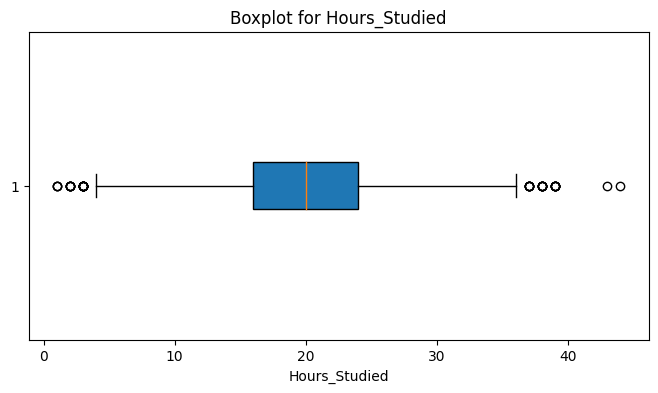

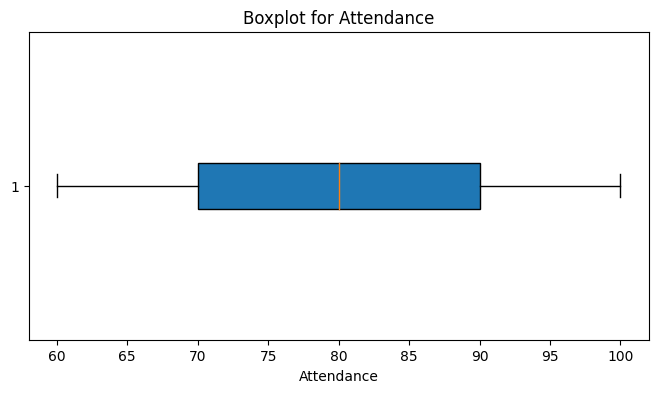

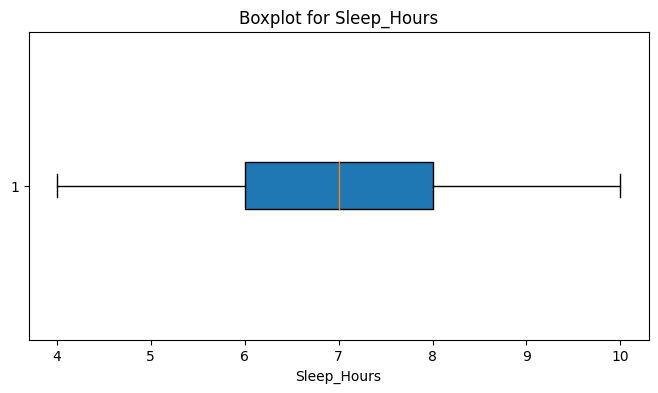

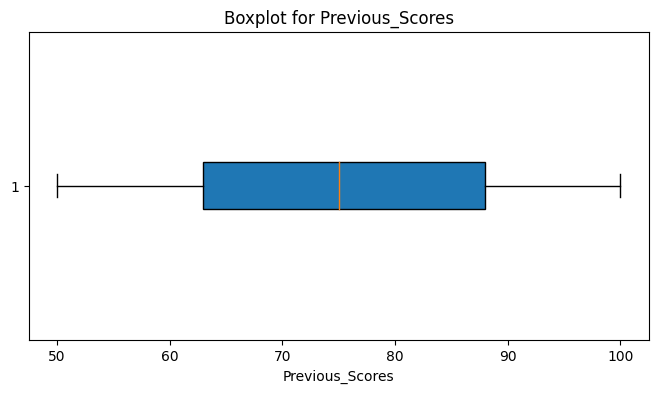

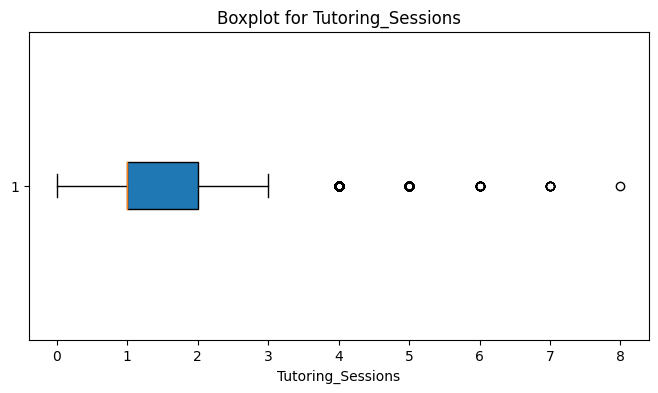

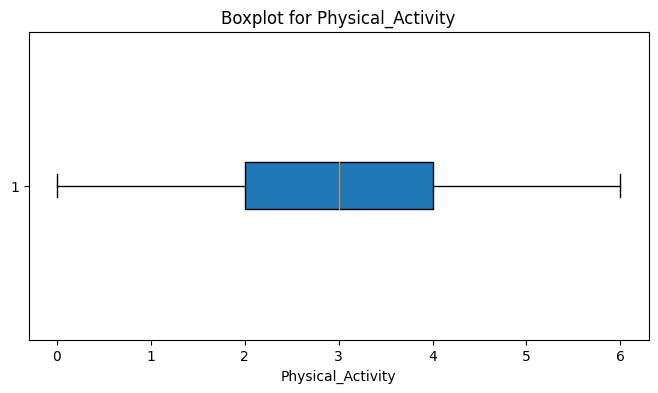

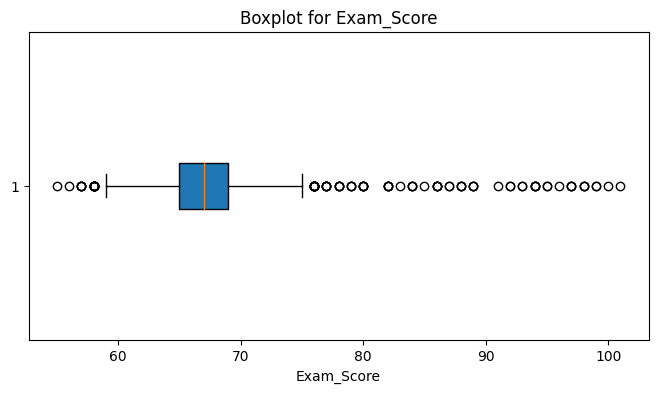

In [7]:
# We can only make box plots of numerical data
numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [8]:
def print_outliers_count(df, numerical_cols, target_column, threshold=1.5):
    outliers_count = {}
    
    for col in numerical_cols:
        if col == target_column:
            continue
        
        # Calculate Q1 & Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    # Print # of outliers for each feature
    for feature, count in outliers_count.items():
        print(f"Feature '{feature}' has {count} outliers.")

target_column = 'Exam_Score'  # Replace with your target column name
print_outliers_count(data, numerical_cols, target_column)


Feature 'Hours_Studied' has 43 outliers.
Feature 'Attendance' has 0 outliers.
Feature 'Sleep_Hours' has 0 outliers.
Feature 'Previous_Scores' has 0 outliers.
Feature 'Tutoring_Sessions' has 430 outliers.
Feature 'Physical_Activity' has 0 outliers.


There is a significant amount of outliers in Tutoring_Sessions and Hours_Studied. After implementing our models, we tested to see the effect of removing the outliers on the performance of the model. We found that removing the outliers significantly decreased the performance of the regression models while classification models performed about the same. As a result, we decided not to remove outliers.

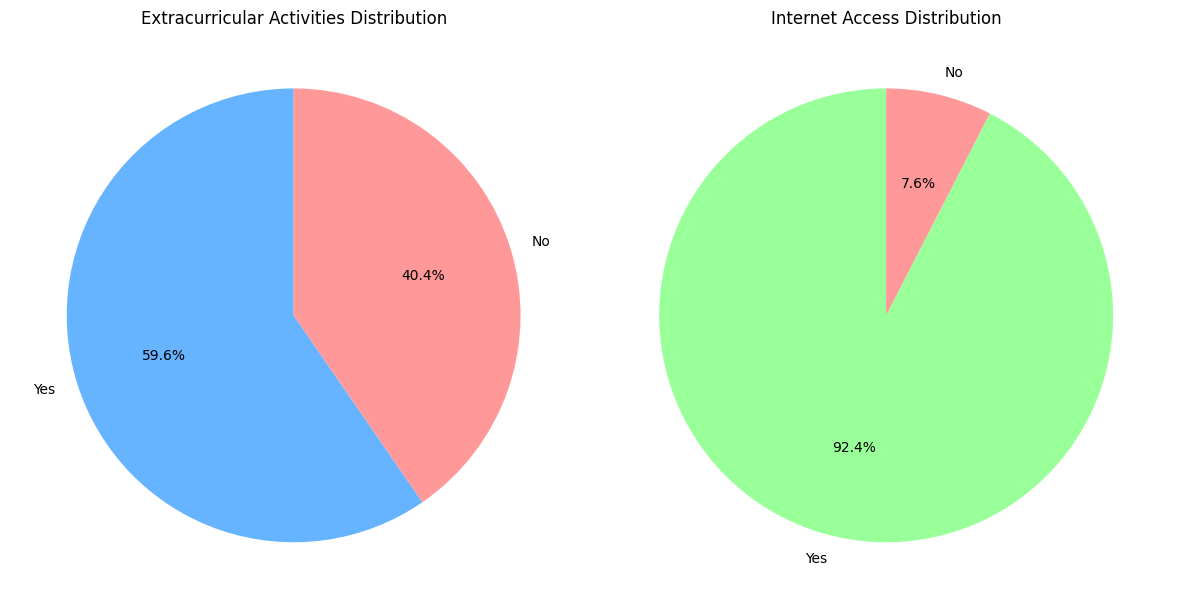

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for 'Extracurricular_Activities'
extracurricular_counts = data['Extracurricular_Activities'].value_counts()
axes[0].pie(extracurricular_counts, autopct='%1.1f%%', labels=['Yes', 'No'], colors=['#66B3FF', '#FF9999'], startangle=90)
axes[0].set_title('Extracurricular Activities Distribution')
axes[0].set_ylabel('') 

# Plot for 'Internet_Access'
internet_access_counts = data['Internet_Access'].value_counts()
axes[1].pie(internet_access_counts, autopct='%1.1f%%', labels=['Yes', 'No'], colors=['#99FF99','#FF9999'], startangle=90)
axes[1].set_title('Internet Access Distribution')
axes[1].set_ylabel('')

# Display the plots
plt.tight_layout()
plt.show()

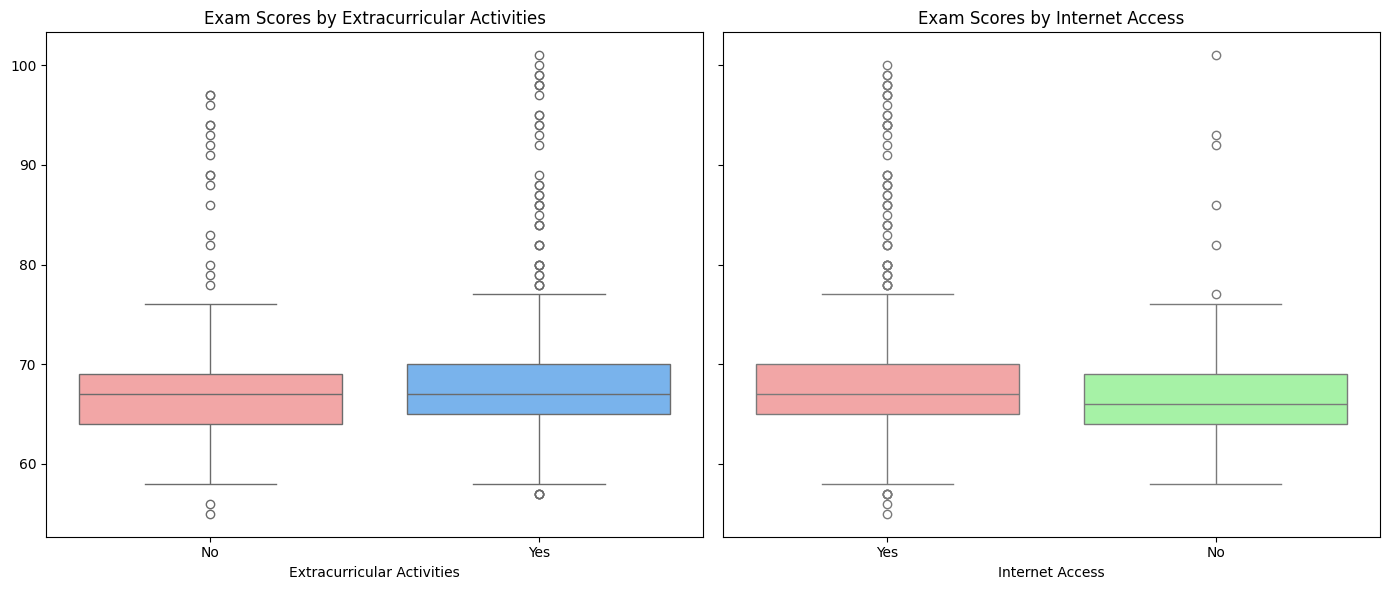

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot: Internet Access vs Exam Score
sns.boxplot(ax=axes[1], x='Internet_Access', y='Exam_Score', data=data, 
            hue='Internet_Access', palette=['#FF9999', '#99FF99'], dodge=False)
axes[1].set_title('Exam Scores by Internet Access')
axes[1].set_xlabel('Internet Access')
axes[1].set_ylabel('Exam Score')

# Boxplot: Extracurricular Activities vs Exam Score
sns.boxplot(ax=axes[0], x='Extracurricular_Activities', y='Exam_Score', data=data, 
            hue='Extracurricular_Activities', palette=['#FF9999', '#66B3FF'], dodge=False)
axes[0].set_title('Exam Scores by Extracurricular Activities')
axes[0].set_xlabel('Extracurricular Activities')
axes[0].set_ylabel('')

# Display plots
plt.tight_layout()
plt.show()


* Both internet access and participation in extracurricular activities are associated with higher medians and more outliers
* Higher IQRs in positive class suggests that benefit is not equally consistent for all students 


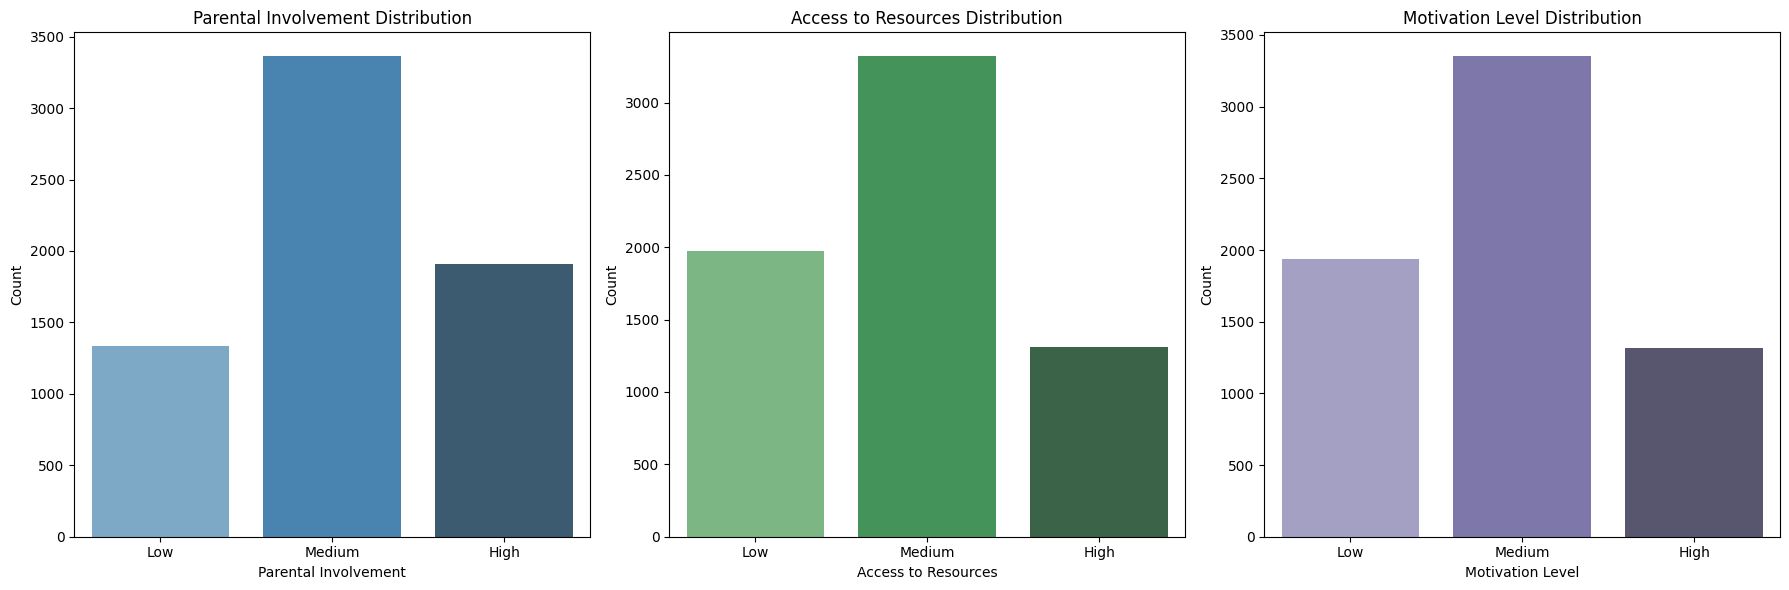

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Parental Involvement
sns.countplot(data=data, x='Parental_Involvement', ax=ax[0], hue='Parental_Involvement', palette='Blues_d', legend=False)
ax[0].set_title('Parental Involvement Distribution')
ax[0].set_xlabel('Parental Involvement')
ax[0].set_ylabel('Count')

ax[0].set_xticks([0, 1, 2]) 
ax[0].set_xticklabels(['Low', 'Medium', 'High'])

# Bar plot for Access to Resources
sns.countplot(data=data, x='Access_to_Resources', ax=ax[1], hue='Access_to_Resources', palette='Greens_d', legend=False)
ax[1].set_title('Access to Resources Distribution')
ax[1].set_xlabel('Access to Resources')
ax[1].set_ylabel('Count')

ax[1].set_xticks([0, 1, 2]) 
ax[1].set_xticklabels(['Low', 'Medium', 'High'])

# Bar plot for Motivation Level
sns.countplot(data=data, x='Motivation_Level', ax=ax[2], hue='Motivation_Level', palette='Purples_d', legend=False)
ax[2].set_title('Motivation Level Distribution')
ax[2].set_xlabel('Motivation Level')
ax[2].set_ylabel('Count')

ax[2].set_xticks([0, 1, 2]) 
ax[2].set_xticklabels(['Low', 'Medium', 'High'])

# Display the plots
plt.tight_layout()
plt.show()

* Most participants fall into the medium category across all three factors
* High and low extremes are not as common


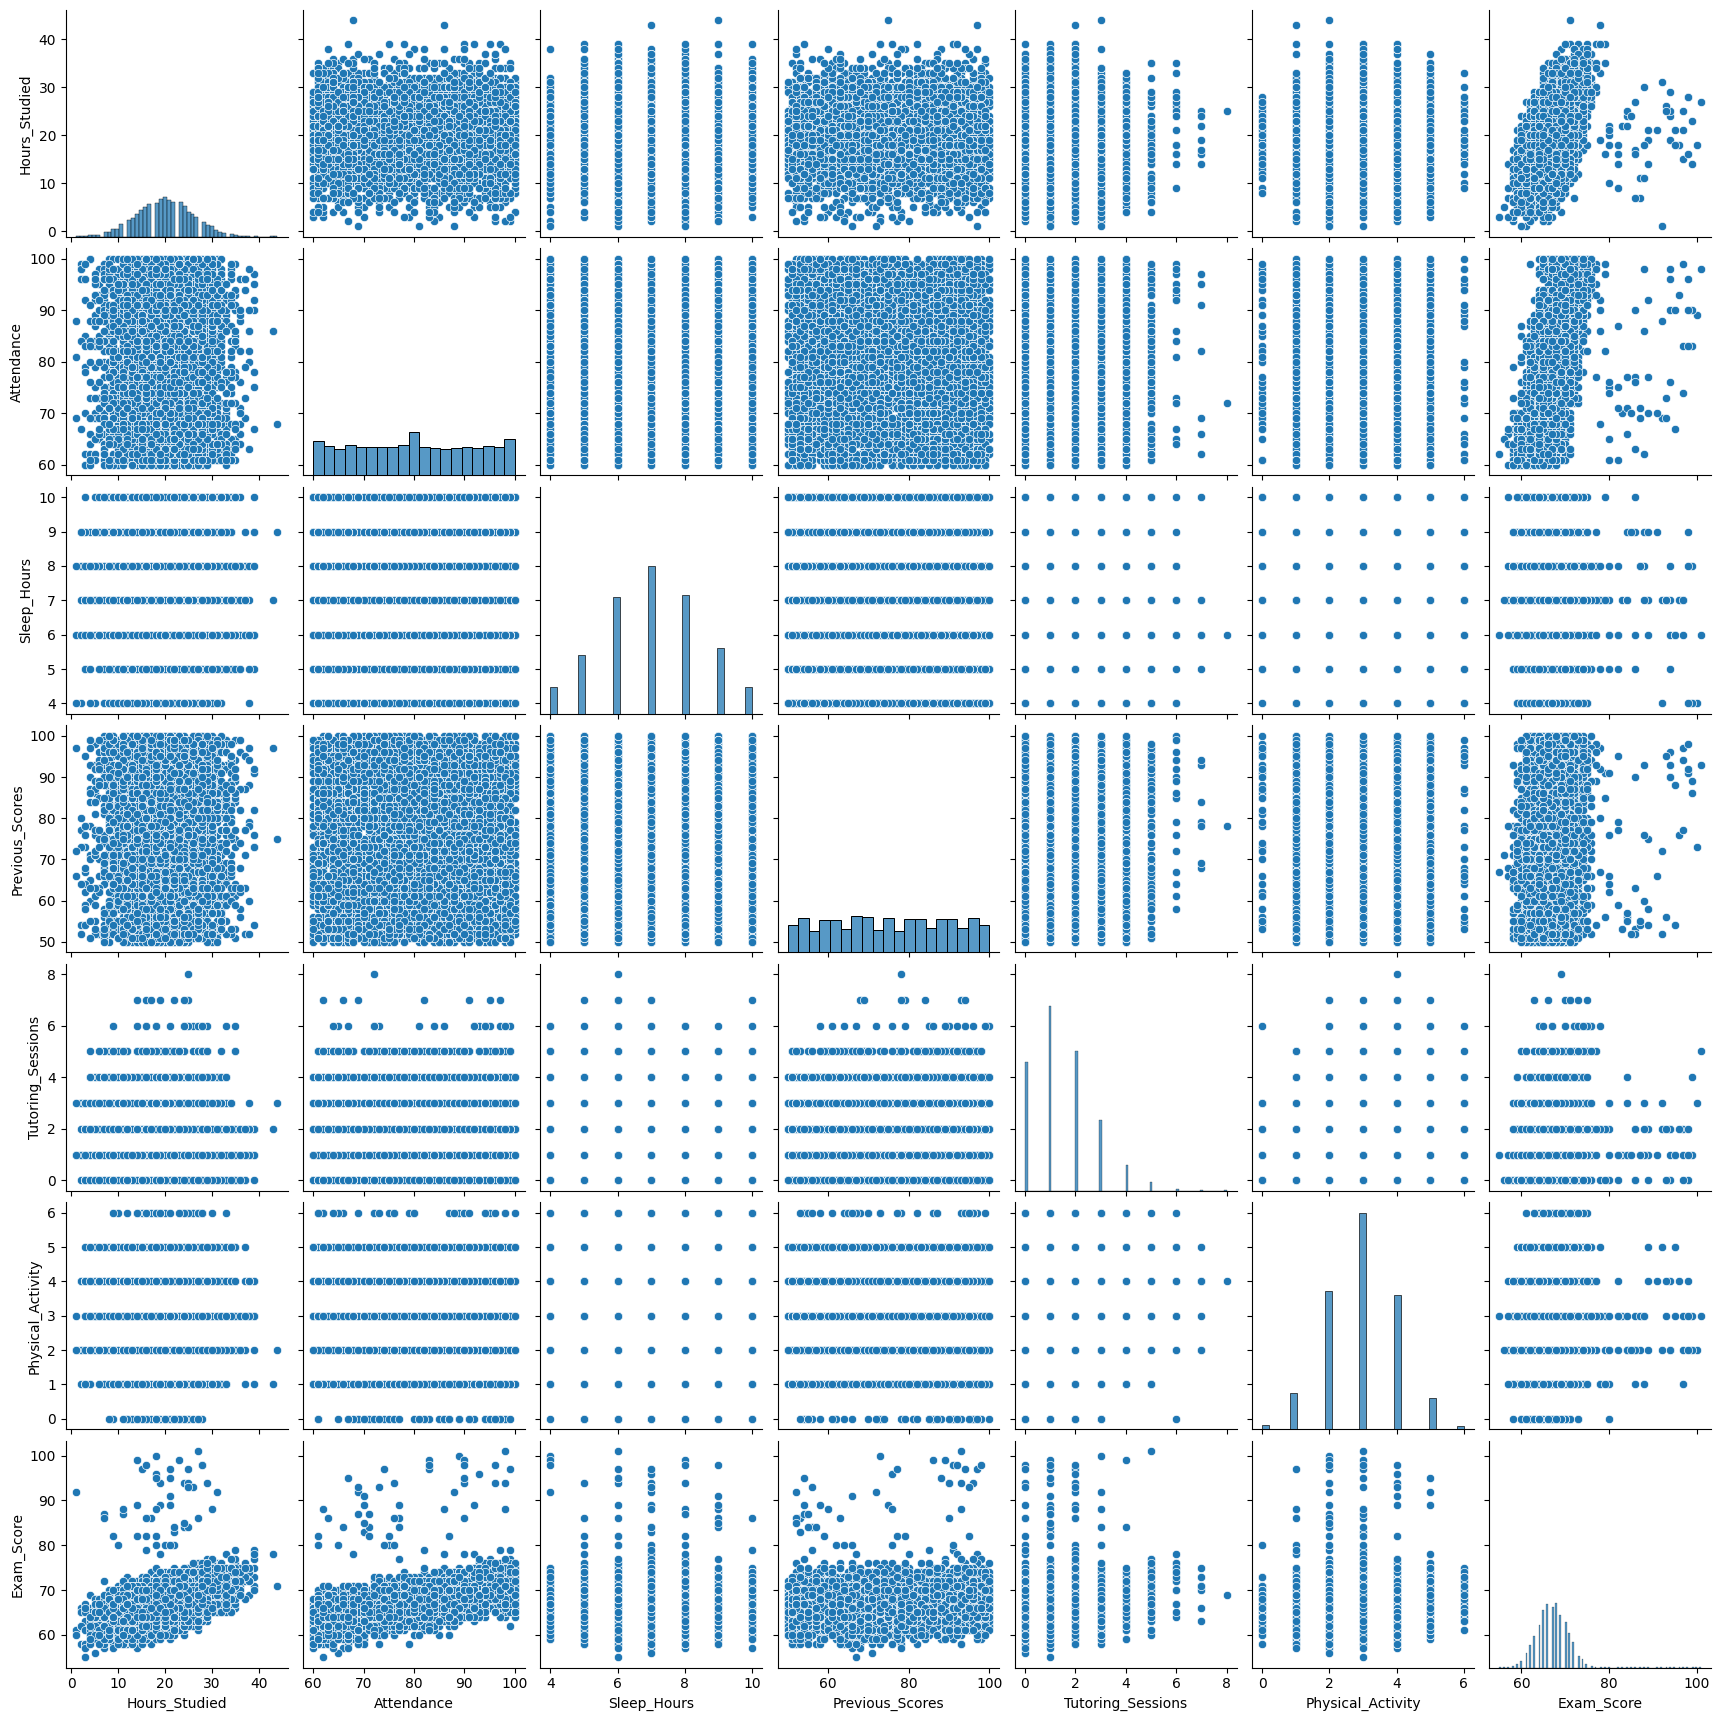

In [12]:
import seaborn as sns

sns.pairplot(data)
plt.show()

In [13]:
rawCorr = data.corr()
for col1 in rawCorr:
    for col2 in rawCorr:
        if col1 < col2 and rawCorr.loc[col1,col2] > 0.5:
            print(f"{col1} vs {col2}: {rawCorr.loc[col1, col2]}")

Attendance vs Exam_Score: 0.5810718633120632


* Attendance and Exam Score are the only correlated features
* Since we're trying to find the exam score, this is fine

<Axes: >

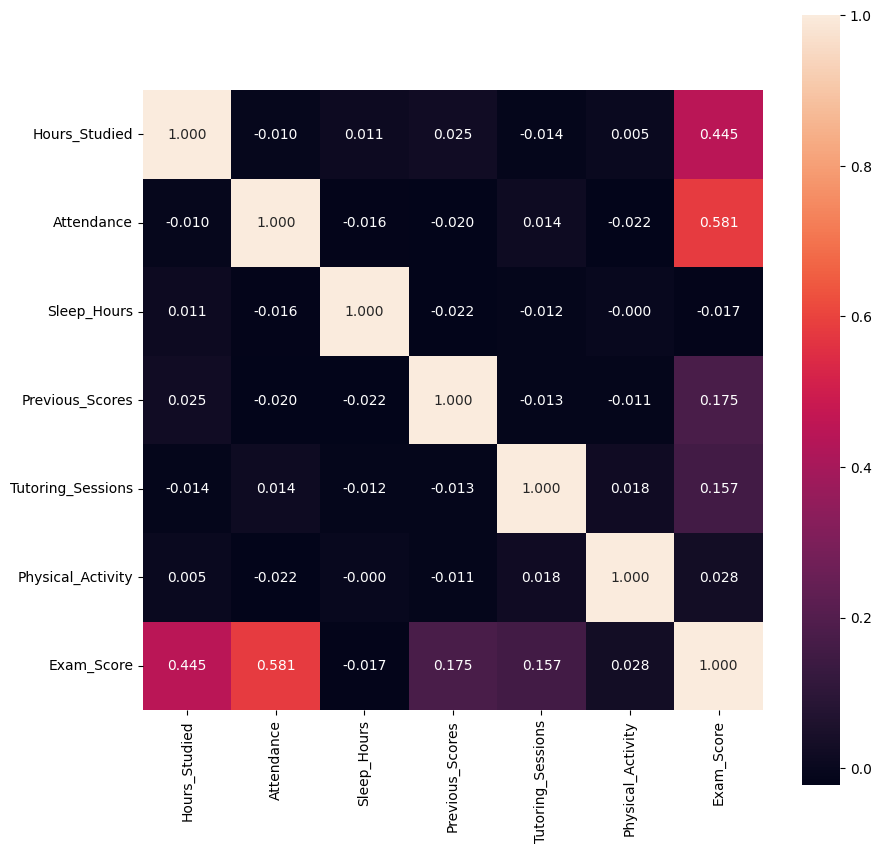

In [14]:
#Correlation heatmap for only numerical values
plt.subplots(figsize=(10,10))
sns.heatmap(rawCorr, annot=True, fmt='0.3f', square=True)

# Preprocessing the Data

In [15]:
# Encoding with References
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
data['Access_to_Resources'] = data['Access_to_Resources'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
data['Family_Income'] = data['Family_Income'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
data['Teacher_Quality'] = data['Teacher_Quality'].map({'Low': 0, 'Medium': 0.5, 'High': 1})
data['School_Type'] = data['School_Type'].map({'Public': 1, 'Private': 0})
data['Peer_Influence'] = data['Peer_Influence'].map({'Positive': 0, 'Neutral': 0.5, 'Negative': 1})
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({'High School': 0, 'College': 0.5, 'Postgraduate': 1})
data['Distance_from_Home'] = data['Distance_from_Home'].map({'Near': 0, 'Moderate': 0.5, 'Far': 1})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Dropping nulls
data.dropna(inplace=True)

data_cleaned = data # Saving a copy of the cleaned dataframe

* Null values found in columns: Teacher_Quality (78), Parental_Education_Level (90), Distance_From_Home (67). These are dropped, they comprise a small proportion of total dataset.
* No duplicate values found
* Encode categorical features
    * Example - Binary features mapped 1/0
        * Gender: Male/Female becomes 1/0
    * Example - Ordinal encoding (clear order that reflects rank)
        * Family_Income: Low/Medium/High becomes 0/0.5/1

In [16]:
# Using StandardScaler here, All numerical values are scaled except Exam_Score (target column)
scaler = StandardScaler()
columns_to_scale = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity"]
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

* Numerical features are scaled using StandardScaler
    * Performance of models when using StandardScaler, on average, was better than when using MinMax

# Exploring the Data (Processed)

In [17]:
#Finding out if any features are correlated with each other
#Only Attendance and Exam score are correlated, so that's fine
corr = data.corr()
for col1 in corr:
    for col2 in corr:
        if col1 < col2 and corr.loc[col1,col2] > 0.5:
            print(f"{col1} vs {col2}: {corr.loc[col1, col2]}")

Attendance vs Exam_Score: 0.5802585402382597


<Axes: >

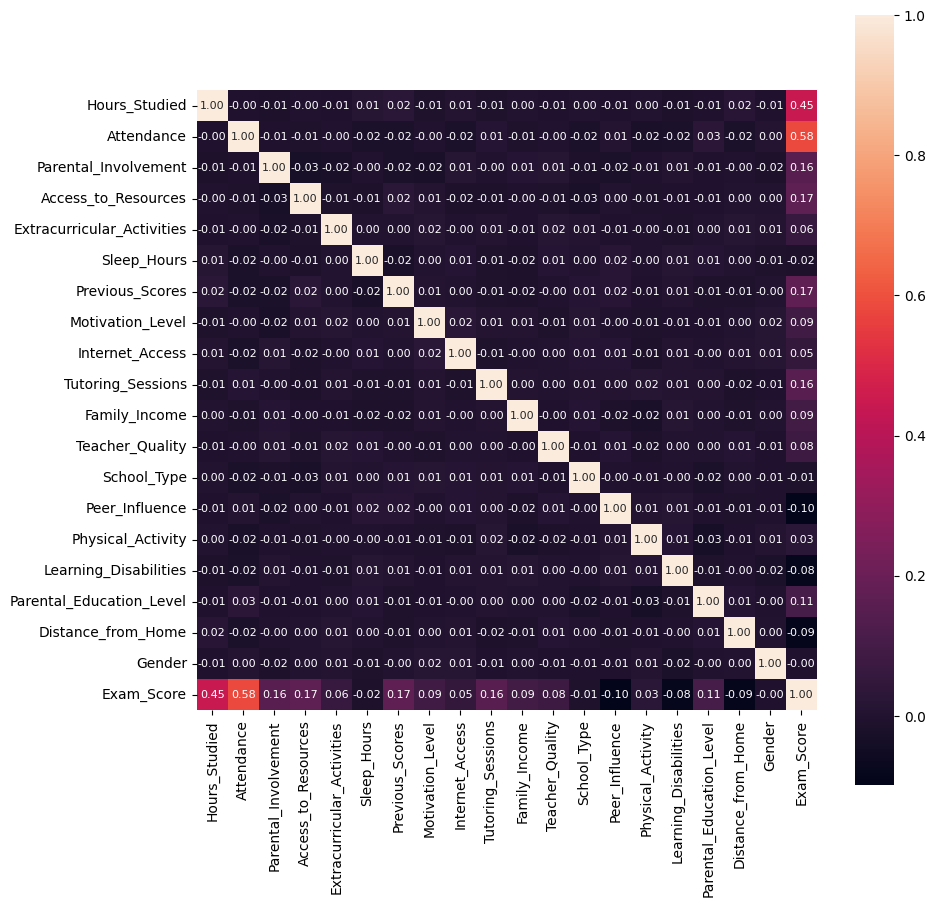

In [18]:
#Correlation heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='0.2f', square=True, annot_kws={'size': 8})

### Dropping data that has little correlation

In [19]:
data.drop('Sleep_Hours', axis=1,inplace=True)
data.drop('School_Type', axis=1,inplace=True)
data.drop('Physical_Activity', axis=1,inplace=True)
data.drop('Gender', axis=1,inplace=True)

* Correlations between features and target: only Attendance and Hours_Studied have a notable correlation
* No correlation between feature columns
* Columns with a correlation less than |0.05| were dropped.
    * This includes: Sleep hours, School type, Physical Activity and Gender

In [20]:
# Split the data into features (X) and target (y)
X = data.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,0.505079,0.344520,0.0,1.0,0,-0.143491,0.0,1,-1.211858,0.0,0.5,0.0,0,0.0,0.0,67
1,-0.163260,-1.387109,0.0,0.5,0,-1.115763,0.0,1,0.409036,0.5,0.5,1.0,0,0.5,0.5,61
2,0.672163,1.556661,0.5,0.5,1,1.106573,0.5,1,0.409036,0.5,0.5,0.5,0,1.0,0.0,74
3,1.507587,0.777428,0.0,0.5,1,1.592709,0.5,1,-0.401411,0.5,0.5,1.0,0,0.0,0.5,71
4,-0.163260,1.037172,0.5,0.5,1,-0.699075,0.5,1,1.219483,0.5,1.0,0.5,0,0.5,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.839248,-0.954201,1.0,0.5,0,0.064853,0.5,1,-0.401411,1.0,0.5,0.0,0,0.0,0.0,68
6603,0.505079,-0.348131,1.0,0.5,0,0.412093,0.5,1,1.219483,0.0,1.0,0.0,0,0.0,0.0,69
6604,0.003825,0.864009,0.5,0.0,1,-0.699075,0.0,1,1.219483,0.0,0.5,1.0,0,1.0,0.0,68
6605,-1.667022,0.517683,1.0,1.0,1,1.106573,1.0,1,0.409036,0.0,0.5,0.0,0,0.0,1.0,68


0    4797
1    1581
Name: Exam_Score, dtype: int64


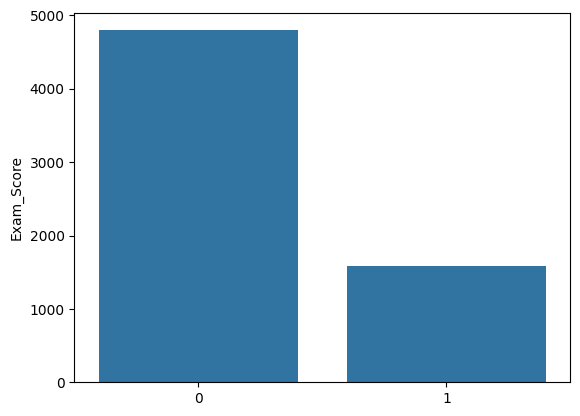

0    4797
1    4797
Name: Exam_Score, dtype: int64


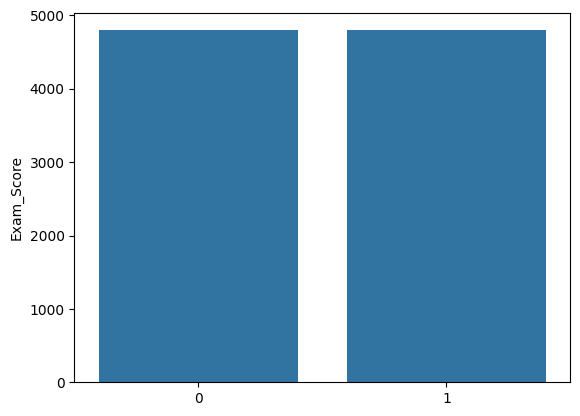

In [21]:
# Add data for classification tasks
passing_grade = 70
y_classification = y.apply(lambda x: 0 if x < passing_grade else 1)

from imblearn.over_sampling import RandomOverSampler,SMOTE
# Before applying SMOTE
print(y_classification.value_counts())
sns.barplot(data=y_classification.value_counts())
plt.show()

smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y_classification)
#After applying SMOTE
print(y_resample.value_counts())
sns.barplot(data=y_resample.value_counts())
plt.show()

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_resample, y_resample, test_size = 0.2, random_state=42)

* For classification, we label exam scores above 70 as passing (1) and below that as fail (0)
* In the case of classification, exam scores contain an imbalance, with roughly 3x more failing scores than passing
* SMOTE is applied to address this, increasing the number of passing training examples (label 1) to equal failing examples (label 0)
* Finally, a 80/20 train/test split is used for training all models


In [22]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
0,0.505079,0.344520,0.0,1.0,0,-0.143491,0.0,1,-1.211858,0.0,0.5,0.0,0,0.0,0.0
1,-0.163260,-1.387109,0.0,0.5,0,-1.115763,0.0,1,0.409036,0.5,0.5,1.0,0,0.5,0.5
2,0.672163,1.556661,0.5,0.5,1,1.106573,0.5,1,0.409036,0.5,0.5,0.5,0,1.0,0.0
3,1.507587,0.777428,0.0,0.5,1,1.592709,0.5,1,-0.401411,0.5,0.5,1.0,0,0.0,0.5
4,-0.163260,1.037172,0.5,0.5,1,-0.699075,0.5,1,1.219483,0.5,1.0,0.5,0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.839248,-0.954201,1.0,0.5,0,0.064853,0.5,1,-0.401411,1.0,0.5,0.0,0,0.0,0.0
6603,0.505079,-0.348131,1.0,0.5,0,0.412093,0.5,1,1.219483,0.0,1.0,0.0,0,0.0,0.0
6604,0.003825,0.864009,0.5,0.0,1,-0.699075,0.0,1,1.219483,0.0,0.5,1.0,0,1.0,0.0
6605,-1.667022,0.517683,1.0,1.0,1,1.106573,1.0,1,0.409036,0.0,0.5,0.0,0,0.0,1.0


In [23]:
# Make a function for evaluating metrics for predicted y values
# Done for both regression and classification
def evaluate_regression(y, y_pred, model):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Model: {model}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    return mse, rmse, mae, r2
    

def evaluate_classification(y, y_pred, model):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average = 'weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average = 'weighted')

    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    conf = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    display = ConfusionMatrixDisplay(conf, display_labels=model.classes_)
    title = "Confusion Matrix for " + type(model).__name__
    ax.set(title=title)
    display.plot(ax=ax)
    return accuracy, precision, recall, f1

def evaluate_classification_nn(y, y_pred, model):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average = 'weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average = 'weighted')

    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    labels = ["Class 0", "Class 1"]

    conf = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    display = ConfusionMatrixDisplay(conf, display_labels=labels)
    title = "Confusion Matrix for Neural Network (Classification)" 
    ax.set(title=title)
    display.plot(ax=ax)
    return accuracy, precision, recall, f1
    

# Regression Models

* For most scikit-learn models, GridSearchCV was performed locally to optimize the hyperparameters by testing multiple parameter combinations
* Often took  >15 minutes depending on the model
* The best hyperparameters were used when training the models in the cloud notebook

## Simple Linear Regression

In [24]:
#Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinR_model = LinearRegression()
LinR_model.fit(X_train, y_train)
y_pred_LinR = LinR_model.predict(X_test)
SLR_MSE, SLR_RMSE, SLR_MAE, SLR_R2 = evaluate_regression(y_test, y_pred_LinR, LinR_model)

Model: LinearRegression()
Mean Squared Error: 4.1626
Root Mean Squared Error: 2.0402
Mean Absolute Error: 0.5302
R2 Score: 0.7321


## Linear Regression with L1 and L2 Regularization

In [25]:
# Linear Regression with L1 and L2 Regularization
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression (L2 Regularization)
# parameters_ridge = {'alpha': [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 10]} 
ridge = Ridge(alpha=0.6) # best alpha param from GridSearch
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
L2R_MSE, L2R_RMSE, L2R_MAE, L2R_R2 = evaluate_regression(y_test, y_pred_ridge, ridge)
print('\n')

# Lasso Regression (L1 Regularization)
#parameters_lasso = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]} 
lasso = Lasso(alpha=0.001) # best alpha param from GridSearch
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
L1R_MSE, L1R_RMSE, L1R_MAE, L1R_R2 = evaluate_regression(y_test, y_pred_lasso, lasso)

Model: Ridge(alpha=0.6)
Mean Squared Error: 4.1625
Root Mean Squared Error: 2.0402
Mean Absolute Error: 0.5302
R2 Score: 0.7321


Model: Lasso(alpha=0.001)
Mean Squared Error: 4.1621
Root Mean Squared Error: 2.0401
Mean Absolute Error: 0.5303
R2 Score: 0.7322


## Decision Tree Regressor

In [26]:
# Regression - Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Decision Tree with Grid Search (best parameters from CV)
dt_reg = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=42, splitter='random')

# Training the model
dt_reg.fit(X_train, y_train)

# Predicting on test Set
y_pred_dtr = dt_reg.predict(X_test)

# Evaluate the Decision Tree Regression Model
DTR_MSE, DTR_RMSE, DTR_MAE, DTR_R2 = evaluate_regression(y_test, y_pred_dtr, dt_reg)

Model: DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=42,
                      splitter='random')
Mean Squared Error: 7.1580
Root Mean Squared Error: 2.6755
Mean Absolute Error: 1.6036
R2 Score: 0.5394


## KNN Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Using best params found from GridSearchCV
# param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_reg = KNeighborsRegressor(leaf_size=10, n_neighbors=9, p=1, weights='distance')

# Training the model
knn_reg.fit(X_train, y_train)

# Predicting on test Set
y_pred_knnR = knn_reg.predict(X_test)

# Evaluate the K Neighbors Regressor Model
KNR_MSE, KNR_RMSE, KNR_MAE, KNR_R2 = evaluate_regression(y_test, y_pred_knnR, knn_reg)

Model: KNeighborsRegressor(leaf_size=10, n_neighbors=9, p=1, weights='distance')
Mean Squared Error: 5.7087
Root Mean Squared Error: 2.3893
Mean Absolute Error: 1.1823
R2 Score: 0.6326


## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Using best params found from GridSearchCV
rf_reg = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', 
                               n_estimators=200, random_state=42)

# Training the model
rf_reg.fit(X_train, y_train)

# Predicting on test set
y_pred_rfR = rf_reg.predict(X_test)

# Evaluate the Random Forest Regressor Model
RFR_MSE, RFR_RMSE, RFR_MAE, RFR_R2 = evaluate_regression(y_test, y_pred_rfR, rf_reg)

Model: RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=200, random_state=42)
Mean Squared Error: 5.2938
Root Mean Squared Error: 2.3008
Mean Absolute Error: 1.0521
R2 Score: 0.6593


## SVM Regressor

In [29]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='poly')

# Training the model
svm_reg.fit(X_train, y_train)

# Predicting on test set
y_pred_svmR = svm_reg.predict(X_test)

# Evaluate the SVM Regression Model
SVR_MSE, SVR_RMSE, SVR_MAE, SVR_R2 = evaluate_regression(y_test, y_pred_svmR, svm_reg)

Model: SVR(kernel='poly')
Mean Squared Error: 4.5576
Root Mean Squared Error: 2.1348
Mean Absolute Error: 0.6601
R2 Score: 0.7067


## AdaBoost Regressor

In [30]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_reg = AdaBoostRegressor(learning_rate=0.01, random_state=42)

# Training the model 
adaboost_reg.fit(X_train, y_train)

# Predicting on test set 
y_pred_abR = adaboost_reg.predict(X_test)

# Evaluate the AdaBoost Regression Model
ABR_MSE, ABR_RMSE, ABR_MAE, ABR_R2 = evaluate_regression(y_test, y_pred_abR, adaboost_reg)

Model: AdaBoostRegressor(learning_rate=0.01, random_state=42)
Mean Squared Error: 8.1106
Root Mean Squared Error: 2.8479
Mean Absolute Error: 1.8030
R2 Score: 0.4781


## Stacking Regressor

In [31]:
from sklearn.ensemble import StackingRegressor

learner_models = [
    ('lr', LinR_model),  # Linear Regression
    ('svr', svm_reg)  # Support Vector Regressor
]

stacking_reg = StackingRegressor(estimators=learner_models, final_estimator=LinR_model)

stacking_reg.fit(X_train, y_train)

y_pred_stackR = stacking_reg.predict(X_test)

StackR_MSE, StackR_RMSE, StackR_MAE, StackR_R2 = evaluate_regression(y_test, y_pred_stackR, stacking_reg)

Model: StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('svr', SVR(kernel='poly'))],
                  final_estimator=LinearRegression())
Mean Squared Error: 4.1666
Root Mean Squared Error: 2.0412
Mean Absolute Error: 0.5292
R2 Score: 0.7319


## Neural Network (Regression)
Note: We are using the same model structure used in Coding Assignment 4 due to its complexity and ability to detect complex patterns

In [32]:
# Implement Learning Rate Scheduler
def lr_schedule(epoch, lr):
    if epoch == 16 or epoch == 33:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Implement ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.5, patience = 2, min_lr = 1e-6, verbose = 1)

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build the NN model
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
nn = Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(15,1)),
    BatchNormalization(),
    Conv1D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='linear')
])

nn.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = nn.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[lr_scheduler, reduce_lr, early_stopping])

y_pred_nn = nn.predict(X_test)

NN_MSE, NN_RMSE, NN_MAE, NN_R2 = evaluate_regression(y_test, y_pred_nn, nn)

Epoch 1/50
160/160 [==============================] - 9s 28ms/step - loss: 64.7161 - mae: 64.7161 - val_loss: 62.8977 - val_mae: 62.8977 - lr: 0.0010
Epoch 2/50
160/160 [==============================] - 4s 24ms/step - loss: 46.7323 - mae: 46.7323 - val_loss: 27.2281 - val_mae: 27.2281 - lr: 0.0010
Epoch 3/50
160/160 [==============================] - 4s 23ms/step - loss: 11.1054 - mae: 11.1054 - val_loss: 3.0154 - val_mae: 3.0154 - lr: 0.0010
Epoch 4/50
160/160 [==============================] - 4s 24ms/step - loss: 6.2265 - mae: 6.2265 - val_loss: 2.3769 - val_mae: 2.3769 - lr: 0.0010
Epoch 5/50
160/160 [==============================] - 4s 22ms/step - loss: 5.4921 - mae: 5.4921 - val_loss: 3.2280 - val_mae: 3.2280 - lr: 0.0010
Epoch 6/50
160/160 [==============================] - 4s 24ms/step - loss: 5.3014 - mae: 5.3014 - val_loss: 1.9377 - val_mae: 1.9377 - lr: 0.0010
Epoch 7/50
160/160 [==============================] - 4s 23ms/step - loss: 5.0882 - mae: 5.0882 - val_loss: 1.5071

In [33]:
from tabulate import tabulate
#Make table with all data
mydata = [["Simple Linear Regression", SLR_MSE, SLR_RMSE, SLR_MAE, SLR_R2], 
["Linear Regression with L2 Regularization", L2R_MSE, L2R_RMSE, L2R_MAE, L2R_R2],
["Linear Regression with L1 Regularization", L1R_MSE, L1R_RMSE, L1R_MAE, L1R_R2],
["Decision Tree Regressor", DTR_MSE, DTR_RMSE, DTR_MAE, DTR_R2],
["K Neighbors Regressor", KNR_MSE, KNR_RMSE, KNR_MAE, KNR_R2],
["Random Forest Regressor", RFR_MSE, RFR_RMSE, RFR_MAE, RFR_R2],
["SVM Regressor", SVR_MSE, SVR_RMSE, SVR_MAE, SVR_R2],
["Adaboost Regressor", ABR_MSE, ABR_RMSE, ABR_MAE, ABR_R2],
["Stacking Regressor", StackR_MSE, StackR_RMSE, StackR_MAE, StackR_R2],
["Neural Network", NN_MSE, NN_RMSE, NN_MAE, NN_R2]]


#make dataframe
head = ["Model", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error", "R2 Score"]

regression_df = pd.DataFrame(mydata, columns=head)
#print the nice table and the dataframe
print(tabulate(mydata, headers=head, tablefmt="grid"))

#Find the location of the lowest metrics
lowest_mse_model = regression_df.loc[regression_df['Mean Squared Error'].idxmin(), 'Model']
lowest_rmse_model = regression_df.loc[regression_df['Root Mean Squared Error'].idxmin(), 'Model']
lowest_mae_model = regression_df.loc[regression_df['Mean Absolute Error'].idxmin(), 'Model']
highest_r2_model = regression_df.loc[regression_df['R2 Score'].idxmax(), 'Model']


print(f"Lowest MSE: {regression_df['Mean Squared Error'].min():.5f} with {lowest_mse_model}")
print(f"Lowest RMSE: {regression_df['Root Mean Squared Error'].min():.5f} with {lowest_rmse_model}")
print(f"Lowest MAE: {regression_df['Mean Absolute Error'].min():.5f} with {lowest_mae_model}")
print(f"Highest R2: {regression_df['R2 Score'].max():.5f} with {highest_r2_model}")

+------------------------------------------+----------------------+---------------------------+-----------------------+------------+
| Model                                    |   Mean Squared Error |   Root Mean Squared Error |   Mean Absolute Error |   R2 Score |
+==========================================+======================+===========================+=======================+============+
| Simple Linear Regression                 |              4.16257 |                   2.04024 |              0.530206 |   0.732127 |
+------------------------------------------+----------------------+---------------------------+-----------------------+------------+
| Linear Regression with L2 Regularization |              4.16247 |                   2.04021 |              0.530207 |   0.732133 |
+------------------------------------------+----------------------+---------------------------+-----------------------+------------+
| Linear Regression with L1 Regularization |              4.16211 |  

* For our dataset, the linear regression models performed the best, hinting that our model was linearly correlated.
* Stacking also performed well, due to the fact that we used a linear model and a svm.
* Adaboost was by far the worst model. Likely because its main mechanism focuses on misclassified points. This could have led to overfitting.
* The Decision tree model didn’t perform well either. This is likely because it creates predictions by dividing the data into regions, which is not well-suited to capture the smooth linear pattern of our data.


## 

# Classification Models

## Simple Logistic Regression Model

Model: LogisticRegression(random_state=42)
Accuracy: 0.9562
Precision: 0.9575
Recall: 0.9562
F1 Score: 0.9562


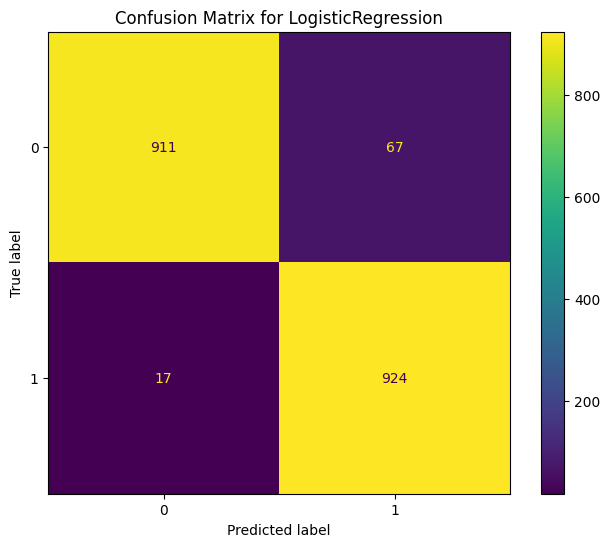

In [34]:
#Simple Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression(random_state=42)
LogR_model.fit(X_train_class, y_train_class)
y_pred_LogR = LogR_model.predict(X_test_class)
SLogR_ACC, SLogR_PRE, SLogR_REC, SLogR_F1 = evaluate_classification(y_test_class, y_pred_LogR, LogR_model)

## Decision Tree Classifier

Model: DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
Accuracy: 0.8984
Precision: 0.8984
Recall: 0.8984
F1 Score: 0.8984


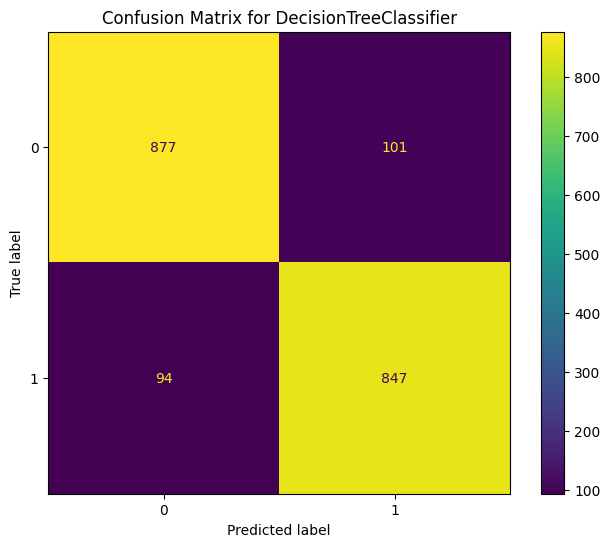

In [35]:
# Classification - Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=8, min_samples_split=5, random_state=42)
DTC.fit(X_train_class, y_train_class)
y_pred_DTC = DTC.predict(X_test_class)
DTC_ACC, DTC_PRE, DTC_REC, DTC_F1 = evaluate_classification(y_test_class, y_pred_DTC, DTC)

## KNN Classifier

Model: KNeighborsClassifier(leaf_size=20, n_neighbors=9, p=1, weights='distance')
Accuracy: 0.9312
Precision: 0.9359
Recall: 0.9312
F1 Score: 0.9311


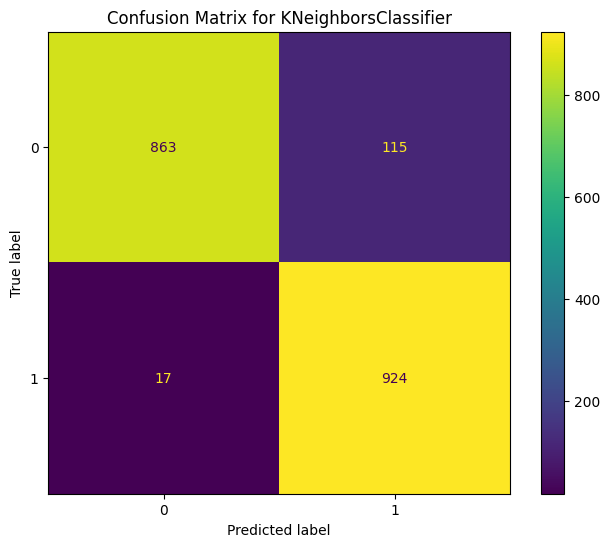

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Using best params found using GridSearchCV
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],      
#     'weights': ['uniform', 'distance'],   
#     'algorithm': ['ball_tree', 'kd_tree', 'brute'],  
#     'leaf_size': [20, 30, 40],            
#     'p': [1, 2],                          
#     'metric': ['minkowski', 'euclidean', 'manhattan']  
# }
knn_class = KNeighborsClassifier(leaf_size=20, n_neighbors=9, p=1, weights='distance')

# Training the model
knn_class.fit(X_train_class, y_train_class)

# Predicting on test Set
y_pred_knnC = knn_class.predict(X_test_class)

# Evaluate the KNN Classification Model
KNC_ACC, KNC_PRE, KNC_REC, KNC_F1 = evaluate_classification(y_test_class, y_pred_knnC, knn_class)

## Random Forest Classifier

Model: RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)
Accuracy: 0.9505
Precision: 0.9507
Recall: 0.9505
F1 Score: 0.9505


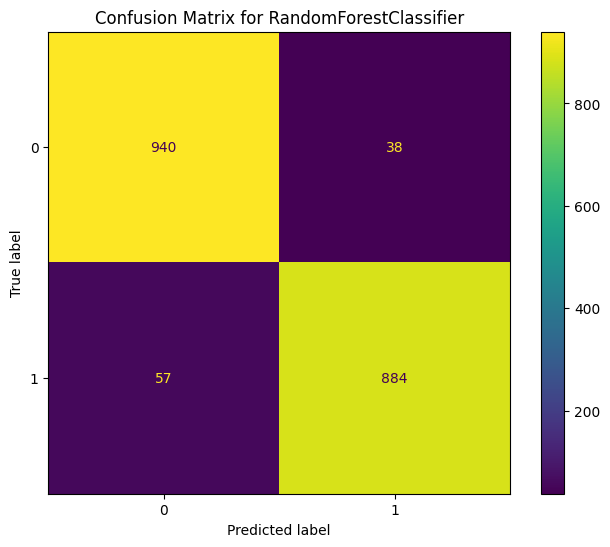

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Using best params found using GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],  
#     'max_depth': [None, 10, 20, 30],                        
# }
rf_class = RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

# Training the model
rf_class.fit(X_train_class, y_train_class)

# Predicting on test Set
y_pred_rfC = rf_class.predict(X_test_class)

# Evaluate the KNN Classification Model
RFC_ACC, RFC_PRE, RFC_REC, RFC_F1 = evaluate_classification(y_test_class, y_pred_rfC, rf_class)

## 

## SVM Classifier

{'C': 3, 'kernel': 'rbf'}
Model: GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3], 'kernel': ['linear', 'rbf']})
Accuracy: 0.9693
Precision: 0.9693
Recall: 0.9693
F1 Score: 0.9693


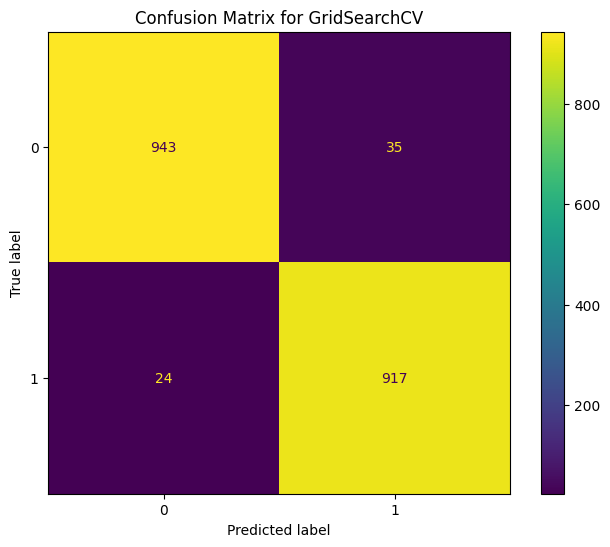

In [38]:
from sklearn.svm import SVC

# Use GridSearchCV to find the best parameters
params = {
    'C': [1, 3],
    'kernel': ['linear', 'rbf'],
}

#Initialize model
svc = SVC()
svm_model = GridSearchCV(svc, params)

#Fit model and find best parameters
svm_model.fit(X_train_class, y_train_class)
print(svm_model.best_params_)

#Predict on test data
predictions_svm = svm_model.predict(X_test_class)

#Evaluate Model
SVC_ACC, SVC_PRE, SVC_REC, SVC_F1 = evaluate_classification(y_test_class, predictions_svm, svm_model)

## AdaBoost Classifier

{'n_estimators': 200}
Model: GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'n_estimators': [50, 100, 200]})
Accuracy: 0.9521
Precision: 0.9522
Recall: 0.9521
F1 Score: 0.9521


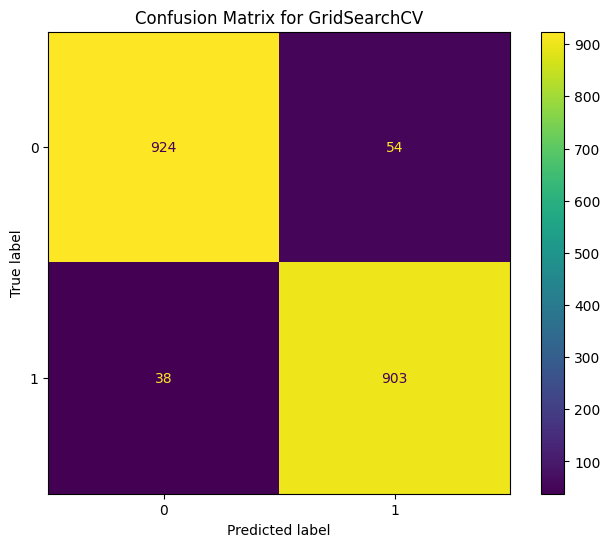

In [39]:
from sklearn.ensemble import AdaBoostClassifier

#Initialize weak learner
decision_tree = DecisionTreeClassifier(max_depth = 1)

#Find optimal number of weak learners using GridSearch
ada_params = {
    'n_estimators': [50, 100, 200]
}

ada = AdaBoostClassifier(decision_tree)
ada_boost = GridSearchCV(ada, ada_params)

#Fit model
ada_boost.fit(X_train_class, y_train_class)
print(ada_boost.best_params_)

#Predict on test data
predictions_ada = ada_boost.predict(X_test_class)

#Evaluate Model
ABC_ACC, ABC_PRE, ABC_REC, ABC_F1 = evaluate_classification(y_test_class, predictions_ada, ada_boost)

## Stacking Classifier

Model: StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_split=5,
                                                       random_state=42)),
                               ('logistic_regression',
                                LogisticRegression(random_state=42)),
                               ('knn',
                                KNeighborsClassifier(leaf_size=20,
                                                     n_neighbors=9, p=1,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression())
Accuracy: 0.9703
Precision: 0.9705
Recall: 0.9703
F1 Score: 0.9703


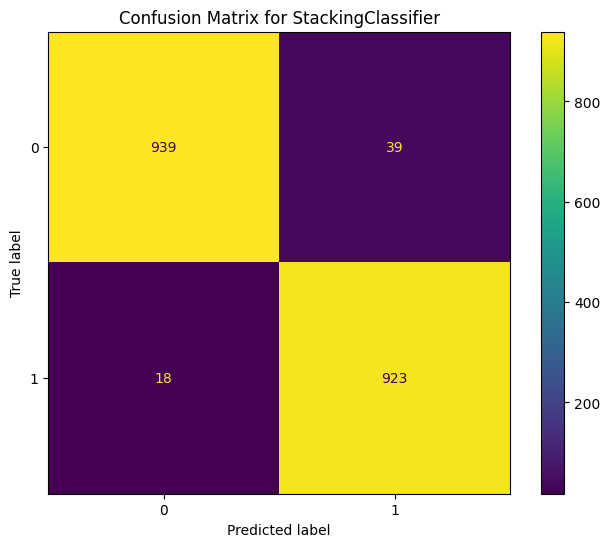

In [40]:
from sklearn.ensemble import StackingClassifier

#Use the previously trained classifier as base learners
learner_models = [
    ('decision_tree', DTC),
    ('logistic_regression', LogR_model),
    ('knn', knn_class)
]

#Initialize stacking model
stacking_model = StackingClassifier(estimators=learner_models, final_estimator=LogisticRegression())

#Fit model
stacking_model.fit(X_train_class, y_train_class)

#Predict on test data
predictions_stacking = stacking_model.predict(X_test_class)

#Evaluate Model
SC_ACC, SC_PRE, SC_REC, SC_F1 = evaluate_classification(y_test_class, predictions_stacking, stacking_model)

## Neural Network (Classification)

Epoch 1/50
240/240 [==============================] - 10s 26ms/step - loss: 0.3667 - accuracy: 0.8521 - val_loss: 0.5659 - val_accuracy: 0.6634 - lr: 0.0010
Epoch 2/50
240/240 [==============================] - 5s 22ms/step - loss: 0.2638 - accuracy: 0.9029 - val_loss: 0.1705 - val_accuracy: 0.9364 - lr: 0.0010
Epoch 3/50
240/240 [==============================] - 5s 21ms/step - loss: 0.2246 - accuracy: 0.9165 - val_loss: 0.1606 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 4/50
240/240 [==============================] - 5s 22ms/step - loss: 0.2094 - accuracy: 0.9216 - val_loss: 0.1474 - val_accuracy: 0.9411 - lr: 0.0010
Epoch 5/50
240/240 [==============================] - 5s 21ms/step - loss: 0.1921 - accuracy: 0.9336 - val_loss: 0.1207 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 6/50
240/240 [==============================] - 5s 22ms/step - loss: 0.1913 - accuracy: 0.9330 - val_loss: 0.1275 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 7/50
235/240 [============================>.] - ETA: 0s -

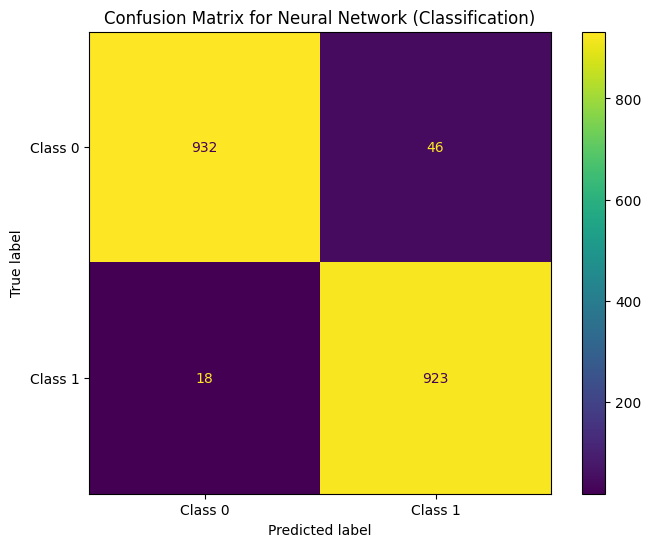

In [41]:
# Learning Rate Scheduler
def lr_schedule_classification(epoch, lr):
    if epoch == 16 or epoch == 33:
        return lr * 0.5
    return lr

lr_scheduler_classification = LearningRateScheduler(lr_schedule_classification)

reduce_lr_classification = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# EarlyStopping
early_stopping_classification = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build the NN model for classification
nn_class = Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(15, 1)),
    BatchNormalization(),
    Conv1D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid') # changed activation function to 'sigmoid' for classification
])

# Compile the model
nn_class.compile(optimizer='adam', 
                 loss='binary_crossentropy',  # Used 'binary_crossentropy' for binary classification
                 metrics=['accuracy'])

# Train the model
history_class = nn_class.fit(x=X_train_class, 
                             y=y_train_class, 
                             batch_size=32, 
                             epochs=50, 
                             validation_data=(X_test_class, y_test_class), 
                             callbacks=[lr_scheduler_classification, reduce_lr_classification, early_stopping_classification])

# Predict on the test set
# We need to binarize the prediction values so that they are 0 or 1
y_pred_nnBC_prob = nn_class.predict(X_test_class)  # Continuous probabilities
y_pred_nnBC = (y_pred_nnBC_prob > 0.5).astype(int)

# Evaluate the Classification Model
NNC_ACC, NNC_PRE, NNC_REC, NNC_F1 = evaluate_classification_nn(y_test_class, y_pred_nnBC, nn_class)

In [42]:
#Make table with all data
mydataClassification = [["Simple Logistic Regression", SLogR_ACC, SLogR_PRE, SLogR_REC, SLogR_F1], 
["Decision Tree Classifier", DTC_ACC, DTC_PRE, DTC_REC, DTC_F1],
["K Neighbors Classifier", KNC_ACC, KNC_PRE, KNC_REC, KNC_F1],
["Random Forest Classifier", RFC_ACC, RFC_PRE, RFC_REC, RFC_F1],
["SVM Classifier", SVC_ACC, SVC_PRE, SVC_REC, SVC_F1],
["Adaboost Classifier", ABC_ACC, ABC_PRE, ABC_REC, ABC_F1],
["Stacking Classifier", SC_ACC, SC_PRE, SC_REC, SC_F1],
["Neural Network Classifier", NNC_ACC, NNC_PRE, NNC_REC, NNC_F1]]
#make dataframe
headClassification = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

classification_df = pd.DataFrame(mydataClassification, columns=headClassification)
#print the nice table and the dataframe
print(tabulate(mydataClassification, headers=headClassification, tablefmt="grid"))
#print(classification_df)

#Find the location of the lowest metrics
highest_acc_model = classification_df.loc[classification_df['Accuracy'].idxmax(), 'Model']
highest_pre_model = classification_df.loc[classification_df['Precision'].idxmax(), 'Model']
highest_rec_model = classification_df.loc[classification_df['Recall'].idxmax(), 'Model']
highest_f1_model = classification_df.loc[classification_df['F1 Score'].idxmax(), 'Model']


print(f"Highest Accuracy: {classification_df['Accuracy'].max():.5f} with {highest_acc_model}")
print(f"Highest Precision: {classification_df['Precision'].max():.5f} with {highest_pre_model}")
print(f"Highest Recall: {classification_df['Recall'].max():.5f} with {highest_rec_model}")
print(f"Highest F1: {classification_df['F1 Score'].max():.5f} with {highest_f1_model}")


+----------------------------+------------+-------------+----------+------------+
| Model                      |   Accuracy |   Precision |   Recall |   F1 Score |
+============================+============+=============+==========+============+
| Simple Logistic Regression |   0.956227 |    0.957511 | 0.956227 |   0.956219 |
+----------------------------+------------+-------------+----------+------------+
| Decision Tree Classifier   |   0.898385 |    0.89842  | 0.898385 |   0.89839  |
+----------------------------+------------+-------------+----------+------------+
| K Neighbors Classifier     |   0.931214 |    0.93588  | 0.931214 |   0.931102 |
+----------------------------+------------+-------------+----------+------------+
| Random Forest Classifier   |   0.950495 |    0.950653 | 0.950495 |   0.950481 |
+----------------------------+------------+-------------+----------+------------+
| SVM Classifier             |   0.969255 |    0.969323 | 0.969255 |   0.969257 |
+---------------

* For our dataset, the stacking model outperformed all other across all tracked statistics. Our stacking model combined a decision tree, logistic regression as well as knn.
* SVM performed next best. SVM tries to find the optimal hyperplane do divide the data. This is perfect for a linear dataset (which discovered during regression models) as the nature of it makes it easy to divide.
* The Decision Tree model didn’t perform very well relative to the others. This is likely because it creates non-linear decision boundaries, even though our dataset is best separated by a straight line.
* Overall, our models all performed well, with accuracies above 93% for all but decision tree. This goes to show that our data manipulation prior to evaluating the models was effective at properly identifying and classifying the data.


# Conclusion

## Data Found: Regression

In [43]:
# Getting Coefficients from the best regression model to have a clean conclusion
# This will let us say what the most impactful part of a student's life

lasso_coefficients = pd.DataFrame(zip(X_train.columns, abs(lasso.coef_)), columns=['Feature', 'Coefficient'])
lasso_coefficients = lasso_coefficients.sort_values('Coefficient', ascending=False)
print("Linear Regression with L1 Regularization Feature Coefficients:")
print(lasso_coefficients)

Linear Regression with L1 Regularization Feature Coefficients:
                       Feature  Coefficient
1                   Attendance     2.290290
3          Access_to_Resources     2.022729
2         Parental_Involvement     2.000849
0                Hours_Studied     1.768205
9                Family_Income     1.117107
6             Motivation_Level     1.088987
10             Teacher_Quality     1.080103
11              Peer_Influence     0.992884
13    Parental_Education_Level     0.964824
14          Distance_from_Home     0.910550
7              Internet_Access     0.872126
12       Learning_Disabilities     0.847477
5              Previous_Scores     0.697177
8            Tutoring_Sessions     0.599962
4   Extracurricular_Activities     0.555007


* After finding the best models, we retrieved the coefficients (or feature importance) for that feature. 
* Our most accurate model, Linear Regression with L1 Regularization, uses the Attendance, Access to Resources, and Parental Involvement features the most.
* Since all of our features have similar ranges, this is not due to a difference in scale.


## Data Found: Classification

In [44]:
# Doing the same as above with the best classification model
# This is a stacking model, so it's more tricky to get the values

# get the estimators from the base learners
final_estimator = stacking_model.final_estimator_
coefficients = final_estimator.coef_

base_learner_coef = [name for name, _ in learner_models]

stacking_coefficients = pd.DataFrame(zip(base_learner_coef, abs(coefficients.flatten())), columns=['Base Learner', 'Coefficient passed to Full Model'])
stacking_coefficients = stacking_coefficients.sort_values('Coefficient passed to Full Model', ascending=False)
print(stacking_coefficients)

# Go through each base learner and their model
stack_dtc = stacking_model.named_estimators_['decision_tree']
stack_logr = stacking_model.named_estimators_['logistic_regression']
#note: knn does not have coefficients or feature importance

dtc_df = pd.DataFrame(zip(X_train.columns, stack_dtc.feature_importances_), columns=['Feature', 'Importance'])
dtc_df = dtc_df.sort_values('Importance', ascending=False)
print("Decision Tree Classifier feature importance:")
print(dtc_df)

logr_df = pd.DataFrame(zip(X_train.columns, abs(stack_logr.coef_.flatten())), columns=['Feature', 'Coefficients'])
logr_df = logr_df.sort_values('Coefficients', ascending=False)
print("Logistic Regression Coefficients:")
print(logr_df)

          Base Learner  Coefficient passed to Full Model
1  logistic_regression                          5.795220
2                  knn                          4.631217
0        decision_tree                          0.699087
Decision Tree Classifier feature importance:
                       Feature  Importance
1                   Attendance    0.473214
0                Hours_Studied    0.259100
3          Access_to_Resources    0.084944
5              Previous_Scores    0.045148
2         Parental_Involvement    0.033555
8            Tutoring_Sessions    0.023103
6             Motivation_Level    0.020482
10             Teacher_Quality    0.014251
14          Distance_from_Home    0.010901
13    Parental_Education_Level    0.010636
12       Learning_Disabilities    0.007759
11              Peer_Influence    0.005932
9                Family_Income    0.005277
7              Internet_Access    0.003384
4   Extracurricular_Activities    0.002316
Logistic Regression Coefficients:
     

* Our most accurate model, the Stacking Classifier, doesn’t have direct correlations to features. Instead, it has coefficients for its base learners. The Logistic Regression model was the most influential model, followed shortly by the KNN model.
* Since the KNN model doesn’t directly analyze the features passed to it, we can’t learn anything about the features.
* Therefore, we can only analyze the Decision Tree Classifier and the Logistic Regression model.
* Both of these models agree that attendance is the most important feature. They both show how access to resources and hours studied are important.

## Data Found: Summary

* By ranking these models, and seeing the most important features, we can come to a conclusion about what the most important features are.
* Overall, Attendance, a student’s access to resources, and the number of hours studied are the most impactful features. Additionally, a student’s involvement with extracurricular activities seem to have the least impact on their exam scores.

## Machine Learning 

* When attempting to find trends a set of data, a complicated model isn’t necessarily the most applicable model. Neural Networks are known to find nonlinear trends in data, making them applicable for a lot of scenarios.
* However, as shown with our Linear Regression model, data can be split linearly. Therefore, all types of models must be considered.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45fc052f-2b57-457d-9973-6e7fda0f74d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>